In [1]:
# pipeline, grid search

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

housing_df = pd.read_csv('~/Documents/datacamp/WBS-School/wbs-housing-iter-0-2/housing-classification-iter-0-2.csv')



In [3]:
X = housing_df.copy()


In [4]:
# target
y = X.pop("Expensive")



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)



In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()


In [7]:
imp.fit(X_train)
X_imp_train = imp.transform(X_train)
df = X_train
new_df = pd.DataFrame(X_imp_train, columns=df.columns, index=df.index)

# print(new_df.isnull().sum())
# print(new_df.shape)

In [8]:
X_train.fillna(X_train.mean(),inplace=True)
# X_train.isnull().sum()


In [9]:
# X_test.isnull().sum()


In [10]:
# X_test.head(3)

In [11]:
X_test.fillna(df.mean(),inplace=True) # 88


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

model = DecisionTreeRegressor()
model.fit(X_imp_train,y_train)


DecisionTreeRegressor()

In [13]:
y_pred = model.predict(X_test)

/Users/cytalladen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_test,
               y_pred = y_pred
              )

0.8767123287671232

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor



In [16]:
# # pipeline

# # 1. initialize transformers & model
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
# dtree = DecisionTreeRegressor(max_depth=6) # best score: 91
dtree = DecisionTreeClassifier(max_depth=6) # best score: 94

# # 2. Create a pipeline
pipe = make_pipeline(imputer, scaler, dtree)
 
# # 3. Fit the pipeline to the training data
pipe.fit(X_train, y_train)
 
# # 4. Use the pipeline to make predictions
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0])

In [17]:
# gridsearch

In [18]:
# create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    # "decisiontreeregressor__max_depth": range(2, 14),
    # "decisiontreeregressor__min_samples_leaf": range(3, 10),
    # "decisiontreeregressor__criterion":["gini", "entropy"]
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2),
    # "kneighborsregressor__n_neighbors":[2,20]

}

In [19]:
# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      verbose=1)

In [20]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=6))]),
             param_grid={'decisiontreeclassifier__max_depth': range(2, 14, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 12, 2),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [21]:
search.best_score_

0.9246610669024463

In [22]:
search.best_params_

{'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'simpleimputer__strategy': 'median',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': False}

In [23]:
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9426369863013698

In [24]:
from sklearn.metrics import mean_squared_error as MSE
# Compute mse_dt train set
mse_dtree = MSE(y_train, y_train_pred)

# Compute rmse_dt
rmse_dtree = mse_dtree**(1/2)

# Print rmse_dt
print("Train set RMSE of dtree: {:.2f}".format(rmse_dtree))

Train set RMSE of dtree: 0.24


In [25]:
y_test_pred = search.predict(X_test)

# accuracy_score(y_test, y_test_pred)

In [26]:
# # Compute mse_dt test set
mse_dtree = MSE(y_test, y_test_pred)

# # Compute rmse_dt
rmse_dtree = mse_dtree**(1/2)

# # Print rmse_dt
print("Test set RMSE of dtree: {:.2f}".format(rmse_dtree))

Test set RMSE of dtree: 0.27


In [27]:
# knn best score : 91

In [ ]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


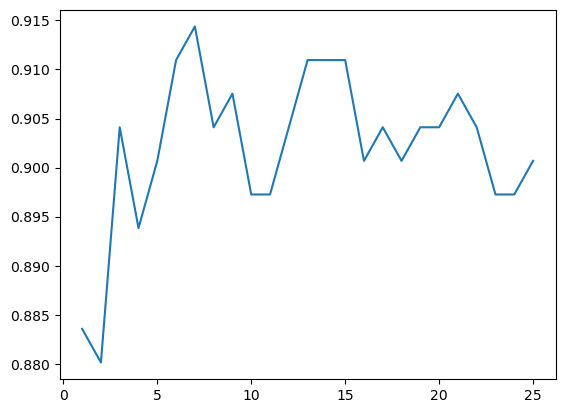

In [29]:
plt.plot(k_range, scores)
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/cytalladen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9143835616438356

In [31]:
# knn + scaler : best score 

In [ ]:
# {'decisiontreeclassifier__max_depth': 6,
#  'decisiontreeclassifier__min_samples_leaf': 5,
#  'simpleimputer__strategy': 'median',
#  'standardscaler__with_mean': True,
#  'standardscaler__with_std': False